# Module 5 Problem Set

<div class="alert alert-block alert-success"><b>Problem 1: </b> 

Consider the function $f(x) = x^4 - 18x^2 + 11, -2 <= x <= 7$

Find the absolute maximum of $f(x)$ on the given interval and the value of x where it occurs.

Find the absolute minimum of $f(x)$ on the given interval and the value of x where it occurs.

In [31]:
import numpy as np

def f(x):
  """
  Calculates the value of the function f(x).

  Args:
    x: The value of x.

  Returns:
    The value of f(x).
  """

  return x**4 - 18*x**2 + 11



x_values = np.linspace(-2, 7, 100)
f_values = f(x_values)

max_value = np.max(f_values)
min_value = np.min(f_values)

max_index = np.argmax(f_values)
min_index = np.argmin(f_values)

print("The absolute maximum of f(x) is: ", max_value)
print("The x-value where the maximum occurs is: ", x_values[max_index])
print("The absolute minimum of f(x) is: ", min_value)
print("The x-value where the minimum occurs is: ", x_values[min_index])

The absolute maximum of f(x) is:  1530.0
The x-value where the maximum occurs is:  7.0
The absolute minimum of f(x) is:  -70.0
The x-value where the minimum occurs is:  3.0


<div class="alert alert-block alert-success"><b>Problem 2: </b> The below function has only one local max and one local min. Use the first derivative test to find where they occur:

$f(x) = 2x^3 - 30x^2 + 144x - 6$

In [32]:
import sympy as sp

def find_local_max_min():
    x = sp.Symbol('x')
    f = 2*x**3 - 30*x**2 + 144*x - 6

    # Step 1: Calculate the first derivative
    f_prime = f.diff(x)

    # Step 2: Find the critical points
    critical_points = sp.solve(f_prime, x)

    local_maxima = []
    local_minima = []

    for point in critical_points:
        # Step 3: Use the second derivative test
        f_double_prime = f_prime.diff(x)
        double_prime_value = f_double_prime.subs(x, point)

        if double_prime_value > 0:
            local_minima.append(point)
        elif double_prime_value < 0:
            local_maxima.append(point)

    return local_maxima, local_minima

# Call the function to find the local maxima and minima
maxima, minima = find_local_max_min()

print("Local Maxima:", maxima)
print("Local Minima:", minima)

Local Maxima: [4]
Local Minima: [6]


<div class="alert alert-block alert-success"><b>Problem 6: </b>

Given the function $g(x) = 6x^3 - 45x^2 + 108x$, find the first derivative, $g'(x)$, $g''(2)$. Visually verify whether the concavity and maximum at $x = 2$.



First derivative is 18*x**2 - 90*x + 108
Second derivative is 36*x - 90
g''(2) = -18


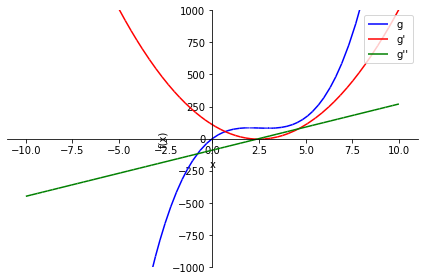

We can visually verify our interpretation of concave down and a maxima


In [33]:
# 6
from sympy import Symbol, lambdify, plotting

x = Symbol('x')
g = 6 * x **3 - 45 * x**2 + 108 * x
# g = 7(x - 5)()
g_first = g.diff(x)
g_second = g_first.diff(x)

print(f"First derivative is {g_first}")
print(f"Second derivative is {g_second}")

g_first_f = lambdify(x, g_first)
g_second_f = lambdify(x, g_second)

p1 = g_second_f(2)

print(f"g''(2) = {p1}")

gp = plotting.plot(g, show=False, ylim=(-1000, 1000), line_color='b', label='g', legend=True)
gp1 = plotting.plot(g_first, show=False, line_color='r', label="g'")
gp2 = plotting.plot(g_second, show=False, line_color='g', label="g''")

gp.append(gp1[0])
gp.append(gp2[0])
gp.show()

print("We can visually verify our interpretation of concave down and a maxima")

<div class="alert alert-block alert-success"><b>Problem 11: </b> <br/>
Glorious Gadgets is a retailer of astronomy equipment. They purchase equipment from a supplier and then sell it to customers in their store. <br/>

The function $C(x) = 3x + 91875x^-1 + 26250$ models their total inventory costs (in dollars) as a function of $x$ the lot size (the total number of pieces of astronomy equipment) for each of their orders from the supplier. The inventory costs include such things as purchasing, processing, shipping, and storing the equipment.
What lot size should Glorious Gadgets order to minimize their total inventory costs? What is their minimum total inventory cost?

In [34]:
def C(x):
  """
  Calculates the total inventory costs C for a given lot size x.

  Args:
    x: The lot size.

  Returns:
    The total inventory costs C.
  """

  return 3 * x + 91875 / x + 26250

min_cost = math.inf
min_lot_size = 0
for x in range(1, 10000):
    cost = C(x)
    if cost < min_cost:
      min_cost = cost
      min_lot_size = x

print("The minimum total inventory costs is", min_cost, "dollars.")
print("The minimum lot size is", min_lot_size, "pieces.")

The minimum total inventory costs is 27300.0 dollars.
The minimum lot size is 175 pieces.


<div class="alert alert-block alert-success"><b>Problem 12: </b> A company has a badly designed product, but a huge advertising budget. The product sells well when it is first introducted. However, sales fall as people switch to a better product from a competitor. Given that the monthly sales S can be modeled by

$S = 200t/(t+3)^2$, where t >=0, where S is in thousands of dollars and t is in months.

After how many months will sales be maximized and what will the maximum in sales be?

In [35]:
from scipy.optimize import minimize_scalar

# Define the sales function
def sales_function(t):
    return 200 * t / (t + 3) ** 2

# Define the negative of the sales function (minimize_scalar finds minimum, so we use negative to find maximum)
def negative_sales_function(t):
    return -sales_function(t)

# Find the value of 't' that maximizes the sales function
result = minimize_scalar(negative_sales_function, bounds=(0, 100), method='bounded')

# Extract the optimal value of 't' and corresponding maximum sales
optimal_t = result.x
maximum_sales = -result.fun  # Convert back to positive value

# Round the values to two decimal places
optimal_t = round(optimal_t, 2)
maximum_sales = round(maximum_sales, 2)

print(f"After {optimal_t} months, the sales will be maximized at ${maximum_sales} thousand.")

After 3.0 months, the sales will be maximized at $16.67 thousand.
